In [3]:
# import Dependencies
import pandas as pd
import csv
import os
import json
import requests
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [4]:
#read in csv file using pandas
path_owid_energy = "/Users/maxbecker/Desktop/Project1_group4/max_folder/resources/owid-energy-data.csv"
data_raw_owid = pd.read_csv(path_owid_energy)

energy_data_18_23=data_raw_owid.loc[(data_raw_owid["year"] >= 2018) & (data_raw_owid["year"] <= 2023)]
energy_data_18_23.head()




,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
18,ASEAN (Ember),2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.647,NaN,NaN,NaN,NaN,NaN,3.47,NaN,0.327,NaN
19,ASEAN (Ember),2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.224,NaN,NaN,NaN,NaN,NaN,5.91,NaN,0.531,NaN
20,ASEAN (Ember),2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.826,NaN,NaN,NaN,NaN,NaN,5.79,NaN,0.526,NaN
21,ASEAN (Ember),2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.130,NaN,NaN,NaN,NaN,NaN,7.63,NaN,0.666,NaN
22,ASEAN (Ember),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.086,NaN,NaN,NaN,NaN,NaN,13.09,NaN,1.086,NaN


In [5]:
countries_of_interest = ["Canada", "United States"]

energy_data_can_usa_18_23 = energy_data_18_23.loc[energy_data_18_23["country"].isin(countries_of_interest)]

energy_data_can_usa_18_23


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
3861,Canada,2018,CAN,37035260.0,1.677189e+12,3.286,0.777,659.715,24.433,284.594,...,0.574,0.246,6.212,4.689,88.556,903.733,33.47,2391.129,5.060,2.165
3862,Canada,2019,CAN,37522584.0,1.708858e+12,1.317,0.322,659.724,24.755,274.768,...,0.622,0.264,-1.780,-1.897,86.659,876.272,32.88,2309.519,5.012,2.130
3863,Canada,2020,CAN,37888704.0,1.622144e+12,-7.288,-1.804,605.735,22.951,252.054,...,0.655,0.294,8.787,7.269,93.928,943.817,35.76,2479.047,5.473,2.458
3864,Canada,2021,CAN,38155012.0,1.703443e+12,6.769,1.554,642.225,24.504,258.420,...,0.799,0.409,4.284,3.666,97.594,911.021,34.76,2557.818,5.374,2.524
3865,Canada,2022,CAN,38454328.0,1.761296e+12,19.920,4.881,764.161,29.385,221.562,...,0.911,0.463,2.895,2.459,100.052,975.963,37.53,2601.851,5.689,2.519
3866,Canada,2023,CAN,38781288.0,NaN,14.727,4.328,869.309,33.713,230.008,...,1.178,0.512,1.459,1.091,101.143,982.432,38.10,2608.044,6.001,2.610
20487,United States,2018,USA,332140032.0,1.812469e+13,-1.325,-5.433,1218.223,404.621,186.156,...,2.222,0.932,7.222,45.081,728.691,820.949,272.67,2193.926,6.490,2.722
20488,United States,2019,USA,334319680.0,1.854055e+13,2.780,11.250,1243.930,415.870,172.021,...,2.570,1.071,8.514,59.126,787.816,885.021,295.88,2356.476,7.115,2.964
20489,United States,2020,USA,335942016.0,1.802736e+13,-9.029,-37.549,1126.150,378.321,162.826,...,3.233,1.408,14.214,108.672,896.488,1005.947,337.94,2668.579,8.358,3.641
20490,United States,2021,USA,336997632.0,1.909938e+13,9.917,37.518,1233.954,415.839,160.980,...,3.958,1.674,11.913,103.127,999.615,1122.263,378.20,2966.237,9.105,3.851


In [6]:
wind_consumption_by_country = energy_data_can_usa_18_23.loc[energy_data_can_usa_18_23["country"].isin(countries_of_interest), ["country", "year", "wind_consumption", "coal_consumption"]]
wind_consumption_by_country

,country,year,wind_consumption,coal_consumption
3861,Canada,2018,88.556,180.959
3862,Canada,2019,86.659,169.154
3863,Canada,2020,93.928,146.178
3864,Canada,2021,97.594,131.237
3865,Canada,2022,100.052,106.977
3866,Canada,2023,101.143,102.974
20487,United States,2018,728.691,3689.458
20488,United States,2019,787.816,3150.460
20489,United States,2020,896.488,2556.181
20490,United States,2021,999.615,2936.894


In [7]:
can_df = wind_consumption_by_country.loc[wind_consumption_by_country["country"] == "Canada",]
can_df

,country,year,wind_consumption,coal_consumption
3861,Canada,2018,88.556,180.959
3862,Canada,2019,86.659,169.154
3863,Canada,2020,93.928,146.178
3864,Canada,2021,97.594,131.237
3865,Canada,2022,100.052,106.977
3866,Canada,2023,101.143,102.974


In [8]:
usa_df = wind_consumption_by_country.loc[wind_consumption_by_country["country"] == "United States"]
usa_df

,country,year,wind_consumption,coal_consumption
20487,United States,2018,728.691,3689.458
20488,United States,2019,787.816,3150.460
20489,United States,2020,896.488,2556.181
20490,United States,2021,999.615,2936.894
20491,United States,2022,1143.709,2752.975
20492,United States,2023,1115.776,2276.868


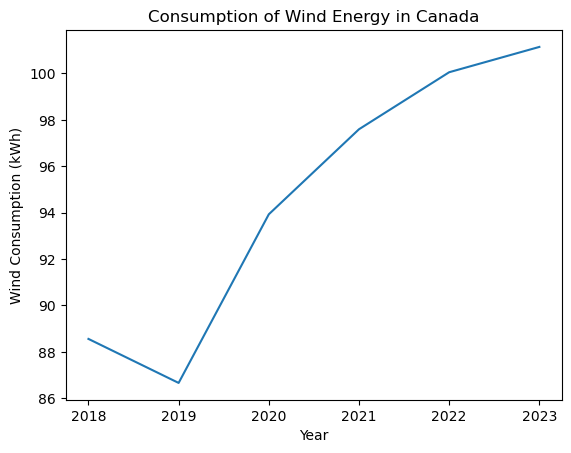

In [9]:
can_plot = plt.plot(can_df["year"], can_df["wind_consumption"])
plt.title("Consumption of Wind Energy in Canada")
plt.xlabel("Year")
plt.ylabel("Wind Consumption (kWh)")
can_plot

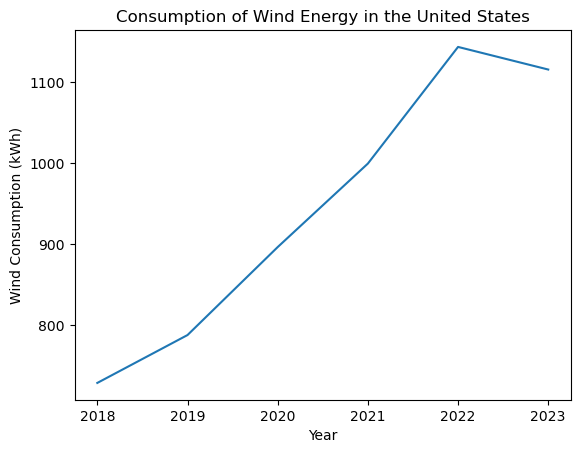

In [12]:
usa_plot = plt.plot(usa_df["year"], usa_df["wind_consumption"])
plt.title("Consumption of Wind Energy in the United States")
plt.xlabel("Year")
plt.ylabel("Wind Consumption (kWh)")
usa_plot